In [10]:
import os

os.getcwd()

'/home/santicr3/Documents/IA/programacioIA/parking'

In [6]:
from ultralytics import YOLO
import os

actual_path = os.path.abspath(os.getcwd())
model_Path='/home/santicr3/Documents/IA/programacioIA/parking/runs/detect/train20/weights/best.pt'
model=YOLO(model_Path)
source_image=actual_path+'/testing/old-car.jpeg'
print(source_image)
"""
images=[
    'data/val/images/ba2b2dbd-captura_20250318-161749.png',
    'data/val/images/be627c47-captura_20250318-161845.png'
]
"""
results = model.predict(
    source=source_image,
    conf=0.25,    # Umbral de confianza
    save=False,   # No que dibuje YOLO; lo haremos manualmente con OpenCV
    verbose=False
)

/home/santicr3/Documents/IA/programacioIA/parking/testing/old-car.jpeg


1
543 331 669 389
Clase: 15, confianza: 0.95


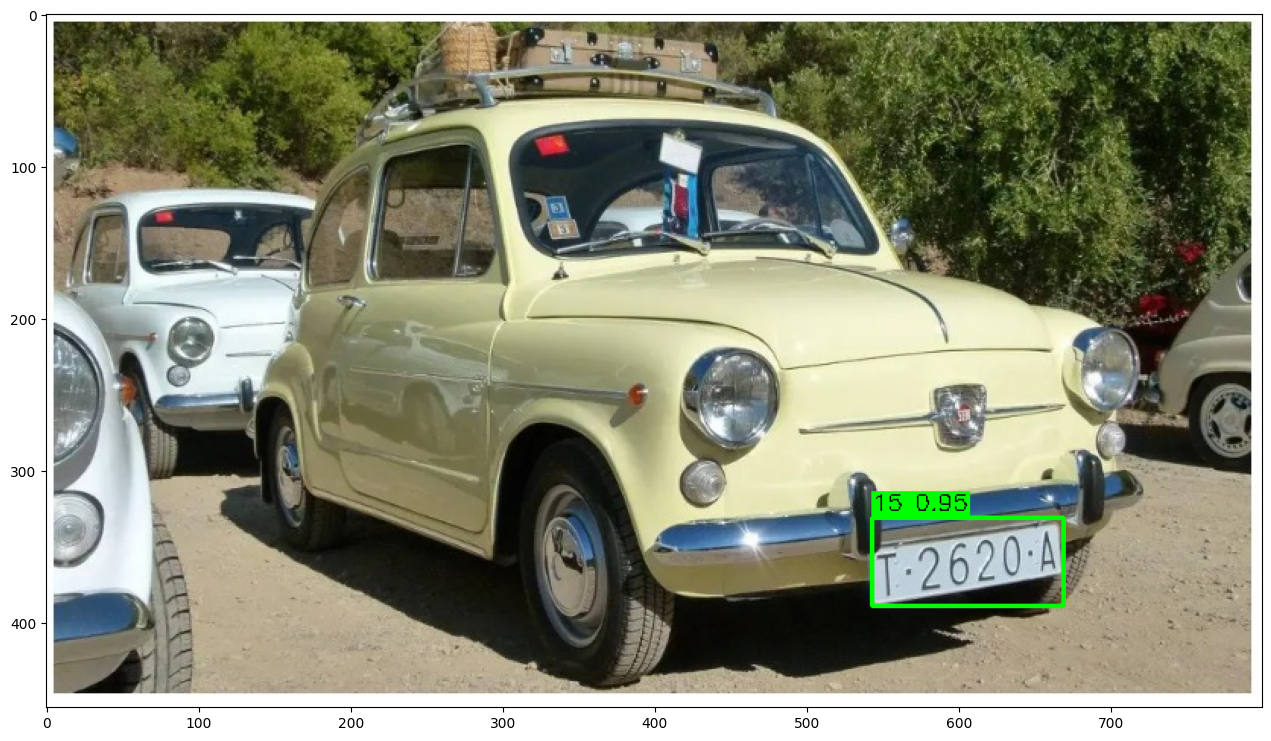

In [7]:
import cv2 
import matplotlib.pyplot as plt

orig_img=cv2.imread(source_image)
orig_img=cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

predictions = results[0]
print(len(predictions))
for box in predictions.boxes:
    x1, y1, x2, y2 = box.xyxy[0]

    # Convertir a int para dibujar con OpenCV
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    print(x1, y1, x2, y2)

    # ID de la clase detectada
    cls_id = int(box.cls[0])

    # Confianza de la detección
    conf = float(box.conf[0])

    # Nombre de la clase (basado en model.names)
    class_name = model.names[cls_id] if model.names and cls_id < len(model.names) else f"cls_{cls_id}"

    print(f"Clase: {class_name}, confianza: {conf:.2f}")
    # Dibujo del rectángulo
    color = (0, 255, 0)  # Verde
    thickness = 2
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), color, thickness)

    # Texto (etiqueta + confianza)
    label = f"{class_name} {conf:.2f}"
    # Para dibujar el fondo del texto (opcional, para que sea legible)
    (tw, th), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    # Caja para el texto encima del bounding box
    cv2.rectangle(orig_img, (x1, y1 - th - baseline), (x1 + tw, y1), color, -1)
    cv2.putText(orig_img, label, (x1, y1 - baseline),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

plt.figure(figsize=(16, 9))
plt.imshow(orig_img)
plt.show()

True

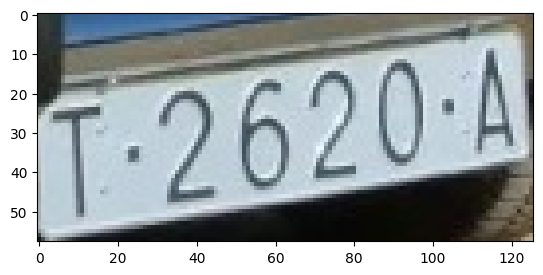

In [8]:
img_NZ_bgr = cv2.imread(source_image, cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]   # a RGB

plate = img_NZ_rgb[y1:y2,x1:x2].copy()

plt.imshow(plate);
cv2.imwrite(actual_path+'/testing/new_plate.png',plate)


In [ ]:
from fast_plate_ocr import ONNXPlateRecognizer
import os

actual_path = os.path.abspath(os.getcwd())
m = ONNXPlateRecognizer('european-plates-mobile-vit-v2-model')
print(m.run('/content/drive/MyDrive/Colab Notebooks/parking/parking/testing/T2620A.png'))